# Lab 5: Clustering with Scikit-Learn

The objective of this notebook is to learn about the **Scikit-Learn** library (<a href="https://scikit-learn.org/stable/" >official documentation</a>) and **clustering**. You can find a good guide at this <a href="https://www.w3schools.com/python/python_ml_k-means.asp" >link</a>.

You can find an **overview of all the available clustering algorithms in Scikit-Learn** <a href="https://scikit-learn.org/stable/modules/clustering.html" >here</a>.

## Tutorial
### Tutorial Outline
- [1. Import Libraries](#1-import-needed-libararies)
- [2. Tutorial Clustering](#2-tutorial---clustering)

    -[2.1 KMeans](#21-k-means)

    -[2.2 Hierarchical](#22-Hierarchical)
    
    -[2.3 DBSCAN](#23-density-based-clustering-dbscan)



### Objective: Learn how to use different clustering techniques

Clustering is unsupervised learning. We want to assign data samples into different groups based on their similarity/proximity. As a result, we can derive, explain, and utilize the properties of such groups. We do not have nor use labels for clustering task, and we use unsupervised metrics to evaluate the performance. However, we can also use labeled data to better understand the obtained clusters with supervised metrics. 

1. **k-Means** is a hard clustering approach (each sample is associated with one and only one cluster), that partitions m observations to k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid). Useful links: <a href="https://en.wikipedia.org/wiki/K-means_clustering">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">K-means in sklearn</a>.
2. **Hierarchical Clustering** builds a tree (dendrogram) representing how observations can be grouped into clusters at different levels. No need to pre-specify the number of clusters.
Useful links: <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">Hierarchical Clustering in sklearn</a>.
3. **Density-based spatial clustering of applications with noise (DBSCAN)** is a density-based hard clustering algorithm, that groups together samples that are connected together in an empirical graph, defining core points, border points, and outliers. Useful links: <a href="https://en.wikipedia.org/wiki/DBSCAN">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN">DBSCAN in sklearn</a>.

### 1. Import needed libararies

In [4]:
#To upgrade scikit learn to latest version. Then restart kernel. You need to run this cell only once.
!python -m pip install scikit-learn --upgrade 

In [5]:
#Libraries for the tutorial
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score

## 2. Tutorial - Clustering

In the tutorial we will use the classical IRIS dataset

In [6]:
# load dataset of IRIS flowers
from sklearn import datasets
iris_data = datasets.load_iris()
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris_data.data, columns = features_iris)
df_iris['type'] = 'setosa'
df_iris.loc[50:99, 'type'] = 'versicolor'
df_iris.loc[100:149, 'type'] = 'virginica'

## 2.1 k-Means

k-Means needs as hyper-parameter the number of clusters k.
Another hyper-parameter is the initialization strategy for the centroid ``init``:
- *random*: centroids will be initialized randomly in the valid data region. You can specify the ``random_state``. Changing the random state may change the result due to a different centroid inizialization.
- *k-means++*: centroids will be equally distant from each other, leading to provably better results than random initialization.
- ndarray: if you have a clue about where centroids could be, you can pass them (i.e. their coordinates) as initialization.

Moreover, ``n_init`` is the number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of clustering error. 

For the tutorial, we will not perform any pre-processing step and directly apply k-Means.
To create the clusters the ``.fit()`` function creates the clustering function and clusters, by minimizing the clustering error on the data.

Here we are using n_init=1 and random initialization. Try to change the used features ``features_iris``, and the hyper-parameters ``n_clusters`` and ``random_state`` and see what changes

In [7]:
features_iris = ['sepal_length', 'petal_length'] # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

kmeans = KMeans(n_clusters=3, init='random', random_state=None, n_init=1)
kmeans.fit(df_iris[features_iris])

# print the clustered labels
print('The clustered labels are:\n', kmeans.labels_)
print()

# print the centroid of each feature for each cluster
print('The centroids are:\n', kmeans.cluster_centers_)
print()

The clustered labels are:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

The centroids are:
 [[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]



You can also visualize the points and their assignments. The following function will show the result if you have 2 features (2D scatter plot). If you have more dimensions, you can plot all the couples of features, or first perform dimensionality reduction (e.g., PCA).

In [8]:
# Helper function to plot the clustering -- only 2 dimensione (if more, it will plot only the first two columns).
def plot_clustering(X, labels, centers=None, title="", subplot=None):

    # Plot in given subplot
    if subplot:
        plt.subplot(subplot)

    # Plot data with labels as color
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)

    # Plot centers if given
    if centers is not None:
        plt.scatter(
            centers[:, 0], centers[:, 1], c="red", s=150, alpha=0.9, label="Centers"
        )

    # Set title
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

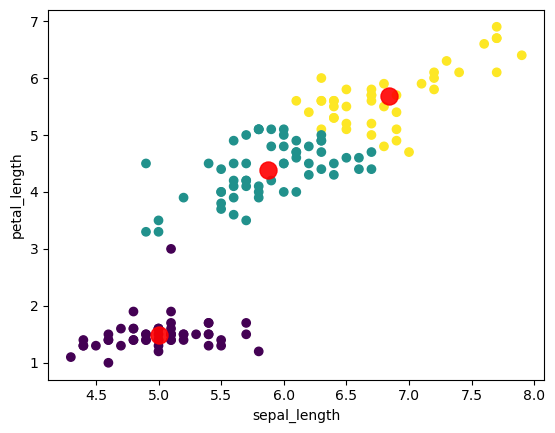

In [9]:
plot_clustering(df_iris[features_iris], kmeans.labels_, kmeans.cluster_centers_)

### Unsupervised clustering performance

After having computed the clusters, we can obtain clustering performance metrics:

- the metric minimized in the clustering algorithm for the empirical data (for k-Means, the mean squared distance of the points from their own centroid)
- the silhouette to measure the similarity of a sample to its own cluster, compared to other clusters (<a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Wiki</a>)

See how the results change by changing the hyper-parameters

In [11]:
#Sum of squared distances of samples to their closest cluster center.
print("Sum of squared distances of the samples from their centroid: ", kmeans.inertia_)
# If we divide it by number of sample m, it is the clustering error we have seen in theoretical lectures
print("Mean squared distances of the samples from their centroid: ", kmeans.inertia_/len(df_iris))

# To compute the silhouette, sklearn provides the silhouette_score in the metrics sklearn.metrics library
print("Silhouette score of the samples: ",silhouette_score(df_iris[features_iris], kmeans.labels_))

Sum of squared distances of the samples from their centroid:  53.80997864410693
Mean squared distances of the samples from their centroid:  0.3587331909607128
Silhouette score of the samples:  0.5890584158017611


We can also compare clusters with the ground-truth labels (or with a different clustering):
- Rand index (RI): given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the Rand index is a function that measures the similarity of the two assignments,
- Adjusted rand index (ARI): corrects the RI for chance and will give a baseline at 0.


In [12]:
# To compute the rand index and adjusted rand index sklearn provides the rand_score and adjusted_rand_score functions
rand_score_result = rand_score(df_iris["type"], kmeans.labels_)
adj_rand_score_result = adjusted_rand_score(df_iris["type"], kmeans.labels_)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)


RI between clustering and given classes is  0.8663982102908278
ARI between clustering and given classes is  0.6988627672348092


### Performance by changing k

k can be chosen based on different criteria. For example:
- Defined by application 
- Desired compression rate
- Elbow (or knee) method 
- Validation error

Here we will run the clustering algorithms with different values of k and evaluate the performances. 

In [17]:
# Here we only have to run k-means with different values of k. 
# You could also run k-means with the same value of k but different random_seed to check different centroids initialization.

#choose the features you want to work on  
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

kmeans_results = []
for k in range(2, 21):
    kmeans_results.append(KMeans(n_clusters=k).fit(df_iris[features_iris]))

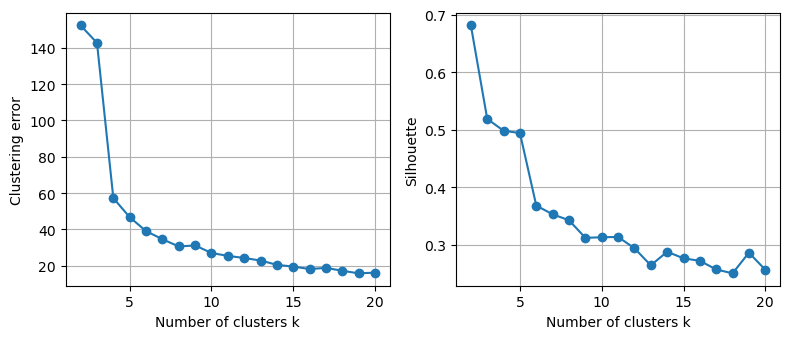

In [18]:
fig, axs = plt.subplots(1,2, figsize=(8, 3.5))

axs[0].plot(
    [k for k in range(2,21)], 
    [result.inertia_ for result in kmeans_results],'-o'
)
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Clustering error")
axs[0].grid()

axs[1].plot(
    [k for k in range(2,21)], 
    [silhouette_score(df_iris[features_iris], result.labels_) for result in kmeans_results],'-o'
)
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Silhouette")
axs[1].grid()

plt.tight_layout()
plt.show()

Here the two plots show contrasting objectives: for clustering error, increasing k will improve the results, while for silhouette increasing k will worsen the results. For clustering error, the addition of an additional cluster cannot result in a larger average distance from the points to their corresponding cluster means. It naturally follows that the raw clustering error will always favour a larger number. Hence, by looking at the silhouette a very small number of k is more appropriate.

## 2.2 Hierarchical Clustering (Agglomerative)

Agglomerative Clustering needs as hyper-parameter the number of clusters k (`n_clusters`).

Another important hyper-parameter is the linkage criterion (`linkage`):
- 'ward' : minimizes the variance of clusters being merged.
- 'complete' : maximizes the distance between clusters.
- 'average' : uses the average of distances between all pairs.

For the tutorial, we will not perform any pre-processing step and directly apply AgglomerativeClustering.
To create the clusters, the `.fit()` function merges the samples step by step according to the linkage rule.

Try to change the used features `features_iris`, and the hyper-parameters and see what changes


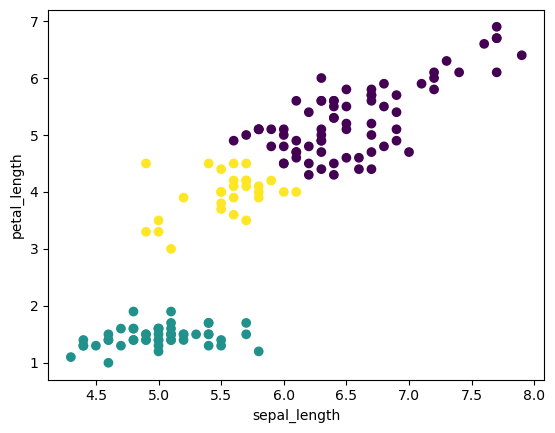

In [19]:
features_iris = ['sepal_length', 'petal_length']  # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(df_iris[features_iris])

# visualize the cluster (only first two dimensions)
plot_clustering(df_iris[features_iris], agglo_labels)

### Clustering performance

After having computed the clusters, measure the average silhouette.
See how the results change by changing the hyper-parameters.

Finally, compare clusters with the ground-truth labels.


In [21]:
# To compute the silhouette, sklearn provides the silhouette_score in the metrics sklearn.metrics library
print("Silhouette score of the samples: ", silhouette_score(df_iris[features_iris], agglo_labels))

# Compare clusters with the ground-truth labels
rand_score_result = rand_score(df_iris["type"], agglo_labels)
adj_rand_score_result = adjusted_rand_score(df_iris["type"], agglo_labels)

print("RI between clustering and given classes is ", rand_score_result)
print("ARI between clustering and given classes is ", adj_rand_score_result)


Silhouette score of the samples:  0.5592458937256731
RI between clustering and given classes is  0.8367785234899329
ARI between clustering and given classes is  0.6422512518362898


## 2.3 Density Based Clustering DBSCAN

Both k-means and AgglomerativeClustering cluster data points using the Euclidean distance, which is a natural measure of similarity in many cases. However, in some applications, the data conforms to a different non-Euclidean structure. One important non-Euclidean structure is based on the notion of connectivity. Here, two data points are considered similar if they can be reached by intermediate data points that have a small Euclidean distance. 

In contrast to k-means and the AgglomerativeClustering, DBSCAN does not require the number of clusters to be pre-defined -  the obtained number will depend on its parameters. Moreover, DBSCAN detects outliers that are interpreted as degenerated clusters consisting of a single data point.

DBSCAN requires specifying two parameters  `eps` and `min_samples`:
- `eps`: the radius to define the neighborhood of a point.

- `min_samples`: the minimum number of points (including the point itself) required to form a dense region.

Points with at least min_samples neighbors within eps are considered core points and form clusters.
Points that are not core points but are close to a core point are border points.
Points that are neither are classified as noise. [Documentation](https://scikit-learn.org/stable/modules/clustering.html#dbscan). 

 We need to set the eps and min_samples parameters, and tune DBSCAN epsilon based on Silhouette index.

For the tutorial, we will not perform any pre-processing step and directly apply DBSCAN.
To create the clusters the ``.fit()`` function creates the clustering function and clusters.

Try to change the used features ``features_iris``, and the hyper-parameters  and see what changes

In [22]:
features_iris = ['sepal_length', 'petal_length'] # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# fit the DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=3)
dbscan.fit(df_iris[features_iris])

DBSCAN(eps=0.4, min_samples=3)

In [23]:
# note that the labels generated by DBSCAN might contain -1 values as result, representing outliers
# print the clustered labels
print('The clustered labels are:\n', dbscan.labels_)
print()

The clustered labels are:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]



In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1


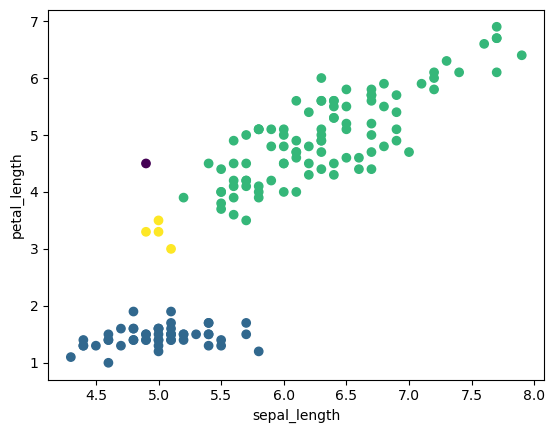

In [25]:
#visualize the clusters (only first two dimensions)
plot_clustering(df_iris[features_iris], dbscan.labels_)

Tune DBSCAN based on silhouette score. Here we only tune eps.

In [30]:
dbscan_results = []
for eps in np.arange(0.05, 0.9, .1): #from 0.05 to 0.9 with steps of 0.1
    dbscan_tmp = DBSCAN(eps=eps, min_samples=3)
    dbscan_tmp.fit(df_iris[features_iris])
    dbscan_results.append((eps, dbscan_tmp))

In [32]:
silhouettes_dbscan = []
silhouettes_dbscan_noOutliers= []

for eps, dbscan_result in dbscan_results:

    # compute silhouette score
    score = silhouette_score(df_iris[features_iris], dbscan_result.labels_)
    silhouettes_dbscan.append((eps, score))
    
    # compute silhouette score only of clustered samples (not noise, i.e., not -1)
    score = silhouette_score(
        df_iris[~df_iris.index.isin(np.where(dbscan_result.labels_ == -1)[0])][features_iris], 
        np.delete(dbscan_result.labels_, np.where(dbscan_result.labels_ == -1))
    )
    silhouettes_dbscan_noOutliers.append((eps, score))
   


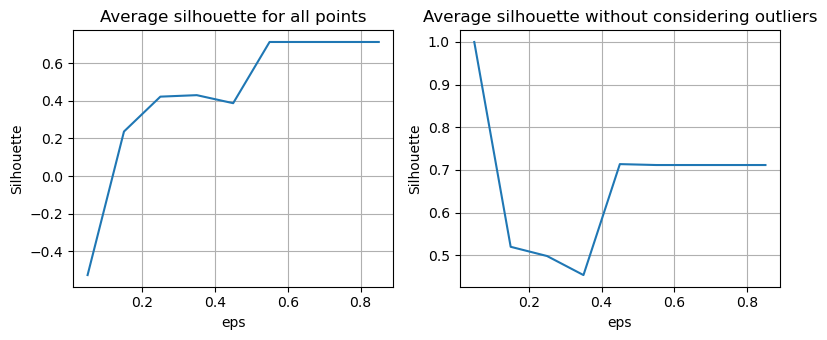

In [29]:
fig, axs = plt.subplots(1,2, figsize=(8, 3.5))

axs[0].plot(
    [eps for (eps, _) in silhouettes_dbscan], 
    [score for (_, score) in silhouettes_dbscan] 
)
axs[0].set_xlabel("eps")
axs[0].set_ylabel("Silhouette")
axs[0].set_title("Average silhouette for all points")
axs[0].grid()

axs[1].plot(
    [eps for (eps, _) in silhouettes_dbscan_noOutliers], 
    [score for (_, score) in silhouettes_dbscan_noOutliers] 
)
axs[1].set_xlabel("eps")
axs[1].set_ylabel("Silhouette")
axs[1].set_title("Average silhouette without considering outliers")
axs[1].grid()

plt.tight_layout()
plt.show()

Considering all points, silhouette becomes very low with a small epsilon. This is because all the samples will be considered noise/outliers. 

In [34]:
dbscan_tmp = DBSCAN(eps=0.05, min_samples=3)
dbscan_tmp.fit(df_iris[features_iris])
dbscan_tmp.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1,  0, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1])

Best results are obtained for larger epsilon (with 2 clusters). Notice that if epsilon becomes very large (e.g., eps=3) all points will be in a single cluster, and silhouette cannot be computed. The second plot accounts only for points that are clustered (removing outliers). A very small eps here seems to suggest better results: however, most of the points are considered noise and only very few points are in the found clusters, with high silhouette (points close to each other and far from the other clusters)

## Exercise 
### Exercise Outline

- [1. Load Dataset](#1)
- [2. K-Means](#2)
- [3. Hierarchical Clustering](#3)
- [4. DBScan](#4)
- [5. Chameleon clusters data](#5)


First, run the following cell to import some useful libraries to complete this Lab. If not already done, you must install them in your virtual environment

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

If the previous cell outputs one the following error: `ModuleNotFoundError: No module named 'sklearn'`, then, you have to install the Scikit-Learn package. If you don't remember how to install a Python package, please retrieve the guide on Anaconda-Navigator.

To install **sklearn** you can use one of the following commands from the terminal of your virtual environment: <br>
`pip install -U scikit-learn` <br>
`conda install -c intel scikit-learn`

<a id='1'></a>
## 1. Load dataset

### Exercise 1.1
Firstly, you will load the first dataset for this lab. Read the csv file from the following path `"data_lab5/lab5_data.csv"` into a DataFrame `df`. The separator of the csv file is the comma `,`. You should skip the header of the first row (i.e., skip the first row) and set the column names to the list stored in the variable `columns`.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>To read a csv file into a DataFrame, you can use pd.read_csv().</li>
    <li>To specify the <strong>separator</strong>, you can set the 'set' parameter.</li>
    <li>To specify the <strong>column names</strong>, you can set the 'names' parameter.</li>
    <li>To specify the <strong>number of rows to skip</strong>, you can set the 'skiprows' parameter.</li>
</ul>
</p>

In [ ]:
columns = ['x', 'y', 'gt']

#### START CODE HERE (~1 line) ####

#### END CODE HERE ####

df

#### Expected output
```                x	         y     gt```<br>
```0	516.012706	393.014514	0```<br>
```1	436.211762	408.656585	0```<br>
```2	512.052601	372.022014	0```<br>
```3	489.140464	401.807159	0```<br>
```4	446.207986	338.516682	0```<br>
```...	       ...	       ...    ...```<br>
```331	638.916471	323.569096	1```<br>
```332	542.005901	347.527070	0```<br>
```333	611.964612	377.254978	0```<br>
```334	520.654168	455.996453	0```<br>
```335	594.479314	392.901455	0```<br>
```336 rows × 3 columns```

The dataset is composed of the `x` and `y` coordinates for 336 points, and the True label in the column `gt`.
The next cell will create a DataFrame with the **input features** (i.e., all the `x` and `y` coordinates of the points) into a new DataFrame `df_X`, and a Series containing the **ground-truth labels** `gt_series`. Run the next cell to create the DataFrame and the Series. Notice that, in this case, we also have the **true labels**. Normally, when using clustering, the true labels are **not** available. 

In [ ]:
df_X = df[["x","y"]].copy()
gt_series = df["gt"].copy()

The next cell defines a function that takes a DataFrames in input, and plots the scatter plot (i.e., the points) contained in the `x` and `y` columns. Run the next cell to define the function.

In [ ]:
def plot_2d_scatter(df, title=""): 
    """Display a 2D scatter plot
    :param df: input data points, DataFrame ('x' and 'y' coordinates in the first and second column, respectively)
    :return: fig, ax, objects
    """
    fig, ax = plt.subplots(figsize=(6, 5), dpi=90) 
    ax.scatter(df.iloc[:,0], df.iloc[:,1])
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)
    ax.set_title(title)
    ax.grid(True)
    return fig, ax # use them for further modifications

The next cell calls the previously defined function and **plots all the points in the input dataset in the plane**. All points are plotted with the same color because you still have not applied clustering. Run the next cell to plot all the points in the plane.

In [ ]:
_, _ = plot_2d_scatter(df_X, "Points in the plane")

Notice that, with 2-dimensional data (like in this case), you can easily visualize the number of clusters because you can plot the points in a plane. In this case, it is reasonable to think that there are 3 distinct clusters. However, the procedure that we will apply in this notebook can also be applied with **higher dimensional data**, which is not visualizable in a plane. Therefore, for high dimensional data, it is challenging to visualize the correct number of clusters. You have to select the best number of clusters based on the analysis of the data.

The next cell defines a function that visualizes each cluster in a plane with a different color. It takes as parameters the points stored in a DataFrame `df` with the $x$ and $y$ coordinates of points stored in the `x` and `y` columns, respectively, the list with the predicted cluster id for each point `y_pred`, and an optional plot title `title`. Run the next cell to define the function.

In [ ]:
def plot_2d_scatter_with_clusters(df, y_pred, title=""): 
    """Display a 2D scatter plot with each cluster with a different color
    :param df: input data points, DataFrame ('x' and 'y' coordinates in the 'x' and 'y' columns, respectively)
    :param y_pred: numpy array with the predicted label for each pointù
    :param title: string containing the title of the chart
    :return: fig, ax, objects
    """    
    fig, ax = plt.subplots(figsize=(6, 5), dpi=90) 
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)
    
    n_clusters = list(set(y_pred)) 
    labels = [f"Cluster {c}" for c in n_clusters]
    
    for i, label in enumerate(n_clusters):
        
        if label == -1:
            label_name = "Outliers"
        else:
            label_name = labels[i]

        #add data points 
        ax.scatter(x=df.loc[y_pred==label, 'x'], 
                    y=df.loc[y_pred==label,'y'], 
                    alpha=0.7, label=label_name)
        
    ax.legend(loc=(1.1, 0.5))
    ax.set_title(title)
    ax.grid(True)
    
    return fig, ax # use them for further modifications

Firstly, we will plot the points with a different color based on the **ground-truth labels** present in the dataset. As discussed before, this dataset contains the true labels. However, the true labels are usually **not** available when performing clustering. We can see that there are **3 well-separated different clusters**. However, some **noise** is present in the clusters (i.e., some green points are closer to the blue cluster than to the green one, etc.). 

Run the next cell to plot the points based on the ground-truth.

In [ ]:
_, _ = plot_2d_scatter_with_clusters(df_X, gt_series, "Ground-Truth")

<a id='2'></a>
## 2. K-Means

### Exercise 2.1

We know from the ground-truth plot that the best number of clusters is 3. Now you will perform the **K-Means algorithm** with **3 as the number of clusters** $k$ to see if the algorithm can correctly identify the clusters. Create a **KMeans object** into a variable called `kmeans` with 3 as the number of clusters $k$ and the number of initialization equal to 10 with the `n_init` parameter (the n_init parameter specifies the number of times the k-means algorithm is run with different centroid seeds). Then, **fit** the KMeans algorithm and **predict** the cluster label for the input points stored in `df_X`. Store the predicted label in a new variable called `y_pred_kmeans`.

You can read the official documentation for the Scikit-Learn implementation of the K-Means algorithm <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" >here</a>.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>You can specify the k value (i.e., number of clusters) for the K-Means algorithm with the 'n_clusters' parameter when creating the KMeans object.</li>
    <li>You can specify the number of initialization for the centroid with the 'n_init' parameter when creating the KMeans object.</li>
</ul>
</p>

In [ ]:
#### START CODE HERE (~2 lines) ####


#### END CODE HERE ####

Now, run the next cell to visualize the predicted clusters in the plane.

In [ ]:
_, _ = plot_2d_scatter_with_clusters(df_X, y_pred_kmeans, "K-Means with $k=3$")

The chart shows that the algorithm, with this data, can correctly identify the 3 clusters.

### Exercise 2.2
Often, you cannot visualize the results of the clustering algorithm graphically because the input features can be **high-dimensional**. Moreover, usually, the **true labels are not available** when performing clustering (i.e., **unsupervised learning**). Now, you will **evaluate the performance** of the K-Means algorithm with $k=3$ with the **silhouette** metric.

**Compute** the **average silhouette** for the cluster division with $k=3$ into a variable `silh_avg`. Then, **print** the silhouette value. Remember, the silhouette is a score in the range [-1, 1] that measures the **cohesion** and the **separation** of clusters (i.e., points within the same cluster must be very cohesive with each other and well separated from points in other clusters). The higher the value, the better the cluster. You can learn more about **silhouette** <a href="https://tushar-joshi-89.medium.com/silhouette-score-a9f7d8d78f29" >here</a> and <a href="https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c" >here</a>.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>To compute the average silhouette you can use the 'silhouette_score' function of the Scikit-Learn library <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html" >link</a>.</li>
    <li>You have to specify the points (e.g., the dataframe) and the predicted cluster labels.</li>
</ul>
</p>

In [ ]:
#### START CODE HERE (~2 lines) ####

#### END CODE HERE ####

#### Expected output
```0.6112689520666093```

The silhouette value shows that K-Means algorithm with $k=3$ performs well with a value that is approximately 0.61.

### Exercise 2.3
Now, you will **evaluate the predicted clusters with respect to the true labels**. Again, usually, the true labels are **not** available. Therefore, you cannot evaluate the clustering algorithm with the true labels. However, the true labels can be available to some datasets used to evaluate **new** clustering algorithms (e.g., if you want to propose a new clustering algorithm). As a **quantitative evaluation metric** you can use the **rand index**. You can learn more about **rand index** <a href="https://www.statology.org/rand-index/" >here</a>.

The Rand index always takes on a value between 0 and 1, where 0 indicates that two clustering methods do not agree on the clustering of any pair of elements, and 1 indicates that two clustering methods perfectly agree on the clustering of every pair of elements (i.e., the higher the value, the better the performance of the algorithm).


Now, **compute** and **print** the **rand index** of the predicted cluster labels and the true labels. Remember that the true labels are stored in the `gt_series` variable.
<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>To compute the average rand index you can use the 'adjusted_rand_score' function of the Scikit-Learn library <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html" >link</a>.</li>
    <li>You have to specify the true labels (e.g., the series or the list with the true labels) and the predicted cluster labels.</li>
</ul>
</p>

In [ ]:
#### START CODE HERE (~2 lines) ####

#### END CODE HERE ####

#### Expected output
```0.9308764986695224```

The rand index value shows that K-Means algorithm with $k=3$ performs well. It correctly assigns most of the cluster labels.

### Exercise 2.4

Can we identify the best number of clusters $k$ without visualizing the ground-truth or the points in a plane? 

As discussed before, ground-truth labels are usually **not** available. Moreover, clustering can also be performed with high dimensional data where you can not visualize the samples in a plane (i.e., identifying the number of clusters just by visualizing it will be difficult).

Now you will perform the KMeans algorithm for **different values of** $k \in [2, 10]$. Then, you will **visualize** and **evaluate** each $k$ division to select the best $k$ with the **silhouette score** and the **cluster charts**.

Implement a loop for each value of $k$ from `min_k` to `max_k` (both included). Then, for each value of $k$ (i.e., each iteration) create a KMeans object with the current number of clusters and the parameter `n_init` equal to 10. Predict the cluster labels for the points stored in `df_X` with the current $k$ (i.e., using the current kmeans object). Append to `y_pred_list` the predicted cluster labels for the current $k$. Compute the current silhouette and append it to `silh_list`.

You can read the official documentation for the Scikit-Learn implementation of the K-Means algorithm <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" >here</a>.

Replace `None` with your code.

In [ ]:
min_k = 2 # Starting from 2 clusters
max_k = 10 # Until 10 clusters

silh_list = [] # List of avg silouhette values for each cluster division (k)
y_pred_list = [] # list of numpy arrays containing the predicted clusters labels for each k

#### START CODE HERE ####
for k in range(None, None): # Define a loop for each k in [min_k, max_k] (both included)
    kmeans_k = None # Create the K-Means object with current k and n_init = 10
    y_pred_kmeans_k = None # Predict the cluster labels with current k
    
    y_pred_list.append(None) # Append the list of predicted cluster labels 
    
    silh_avg_k = silhouette_score(None, None) # Compute the average silhouette for current k
    silh_list.append(None) # Append the average silhoette
    
#### END CODE HERE ####

The next cell visualizes the plots of all the $k$ values

In [ ]:
for k in range(min_k, max_k+1):
    _, _ = plot_2d_scatter_with_clusters(df_X, y_pred_list[k-min_k], f"K-Means Clustering with {k} clusters")

What do you think is the best k-value? Why?

In [ ]:
#### START ANSWER HERE ####

#### END ANSWER HERE ####

Now, you will plot the average silhouette value for each $k$ value analyzed. Please, run the next cell to visualize the plot.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
x = range(len(silh_list))
x_ticks = range(min_clusters, max_clusters+1)

ax.plot(x, silh_list, marker='*')
ax.set_xticks(x, x_ticks)
ax.set_xlabel("Number of clusters (k)")
ax.set_ylabel("Silhouette")
ax.grid(True)

From this silhouette graph, what do you think is the best k-value? Has your answer changed since before? Why?

In [ ]:
#### START ANSWER HERE ####

#### END ANSWER HERE ####

<a id='3'></a>
## 3. Hierarchical Clustering

Here, is already provided to you the code to run the **Hierarchical clustering**. Run the next cells to perform the hierarchical clustering. The dendrogram of the hierarchical clustering is automatically cut to match the `n_clusters` specified. You can read the documentation of the agglomerative clustering <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html" >here</a>.

In [ ]:
n_clusters = 3
hc = AgglomerativeClustering(n_clusters)
y_pred_hc = hc.fit_predict(df_X)

In [ ]:
_, _ = plot_2d_scatter_with_clusters(df_X, y_pred_hc, f"Hierarchical Clustering with {n_clusters} clusters")

In [ ]:
silh_avg_hc = silhouette_score(df_X, y_pred_hc)
print(silh_avg_hc)

You can see that the result is practically the same.

<a id='4'></a>
## 4. DBScan

Here, is already provided to you the code to run the **Density-based clustering (dbscan)**. Run the next cells to perform the dbscan clustering. The dbscan does not require the specification of the number of clusters. Moreover, it also identifies the outliers. However, it require the specification of two parameters: epsilon and the minimum number of points that are often difficult to set. You can read the documentation of the dbscan clustering <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html" >here</a>.

In [ ]:
dbscan = DBSCAN(eps=20, min_samples=10)

In [ ]:
y_pred_dbscan= dbscan.fit_predict(df_X)

In [ ]:
_, _ = plot_2d_scatter_with_clusters(df_X, y_pred_dbscan, "DBScan Clustering")

The red points are the outliers.

<a id='5'></a>
## 5. Chameleon clusters data

Now, you will move to another dataset, the `chameleon_clusters` data. This time the true labels are not available.
The next cell loads the data into a DataFrame `df_X_cc`. Please run the next cell to load the data.

In [ ]:
df_X_cc = pd.read_csv("data_lab5/chameleon_clusters.csv", sep=",")
df_X_cc

Run the next cell to plot the points in the plane.

In [ ]:
_, _ = plot_2d_scatter(df_X_cc, "Points in the plane")

You can see that this time the points are distributed in a more complicated manner. It is also more difficult to identify the best number of clusters. In addition, there are many points that are outliers.

### Exercise 5.1

Now, you will implement the same loop as for exercise 2.4. The loop iterates over different values of $k$ from `min_k` to `max_k`. For each $k$ value (i.e., each iteration) create a KMeans object with the current number of clusters and the parameter `n_init` equal to 10. Predict the cluster labels for the points stored in `df_X_cc` with the current $k$ (i.e., using the current kmeans object). Append to `y_pred_list` the predicted cluster labels for the current $k$. Compute the current silhouette and append it to `silh_list`.

You can read the official documentation for the Scikit-Learn implementation of the K-Means algorithm <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" >here</a>.

Replace `None` with your code.

In [ ]:
min_k = 2 # Starting from 2 clusters
max_k = 10 # Until 10 clusters
silh_list = [] # List of avg silouhette values for each cluster division (k)
y_pred_list = [] # list of numpy arrays containing the predicted clusters labels for each k

#### START CODE HERE ####
for k in range(None, None): # Define a loop for each k in [min_k, max_k]
    kmeans_k = None # Define the kmeans object with current k and n_init = 10
    y_pred_kmeans_k = None # Predict the cluster labels with current k
    
    y_pred_list.append(None) # Append the predicted labels to the list of predictions
    
    silh_avg_k = silhouette_score(None, None) # Compute the average silhouette for the current k
    silh_list.append(None) # Append the current average silhouette to the list of silhouette values
#### END CODE HERE ####

The next cell visualizes the clusters plots of all the $k$ values.

In [ ]:
for k in range(min_k, max_k+1):
    _, _ = plot_2d_scatter_with_clusters(df_X_cc, y_pred_list[k-min_k], f"K-Means Clustering with {k} clusters")

In this case, KMeans performs worse. In fact, it fails to detect clusters correctly. You can see that it tends to form spherical clusters. Moreover, it is not suitable for clusters and points with different densities.

Now, you will plot the average silhouette value for each $k$ value analyzed. Please, run the next cell to visualize the plot.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
x = range(len(silh_list))
x_ticks = range(min_clusters, max_clusters+1)

ax.plot(x, silh_list, marker='*')
ax.set_xticks(x, x_ticks)
ax.set_xlabel("Number of clusters (k)")
ax.set_ylabel("Silhouette")
ax.grid(True)

From the silhouette graph, the best k-number seems to be 2. However, we can visually see that it is not very effective.

### Exercise 5.2

For this type of data with different densities, **dbscan** may be a better choice. Perform the clustering with the **dbscan** algorithm for the data stored in `df_X_cc`. Store the predicted labels in a variable `y_pred_dbscan`. Set the parameters of the DBSCAN object as follows: `eps`=10 and `min_samples`=20. Go ahead and try changing the values to see how the results change. You can read the documentation of the dbscan clustering <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html" >here</a>.

In [ ]:
#### START CODE HERE (~2 lines) ####

#### END CODE HERE ####

Now, run the next cell to plot the results.

In [ ]:
_, _ = plot_2d_scatter_with_clusters(df_X_cc, y_pred_dbscan, "DBScan Clustering")

Graphically, you can see that the DBScan seems to perform much better in this case. It can identify clusters of points and also outliers.